In [275]:
import pandas as pd
import numpy as np

In [276]:
data = pd.read_csv("Churn1.csv")

data.head()

,Gender,SeniorCitizen,Partner,Dependents,InternetService,Contract,Churn
0,Female,No,Yes,No,DSL,Month-to-month,No
1,Male,No,No,No,DSL,One year,No
2,Male,No,No,No,DSL,Month-to-month,Yes
3,Male,No,No,No,DSL,One year,No
4,Female,No,No,No,Fiber optic,Month-to-month,Yes


In [277]:
data.isnull().sum()

Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
InternetService    0
Contract           0
Churn              0
dtype: int64

In [308]:
data.describe().T

,count,unique,top,freq
Gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
InternetService,7043,3,Fiber optic,3096
Contract,7043,3,Month-to-month,3875
Churn,7043,2,No,5174


In [279]:
data_copy = data.copy(deep = True)
data_copy['Gender'].replace(['Male', 'Female'],
                        [1, 0], inplace=True)
data_copy['SeniorCitizen'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)
data_copy['Partner'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)
data_copy['Dependents'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)
data_copy['InternetService'].replace(['DSL', 'Fiber optic','No'],
                        [2,1,0], inplace=True)
data_copy['Contract'].replace(['Month-to-month', 'One year','Two year'],
                        [2,1,0], inplace=True)
data_copy['Churn'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)


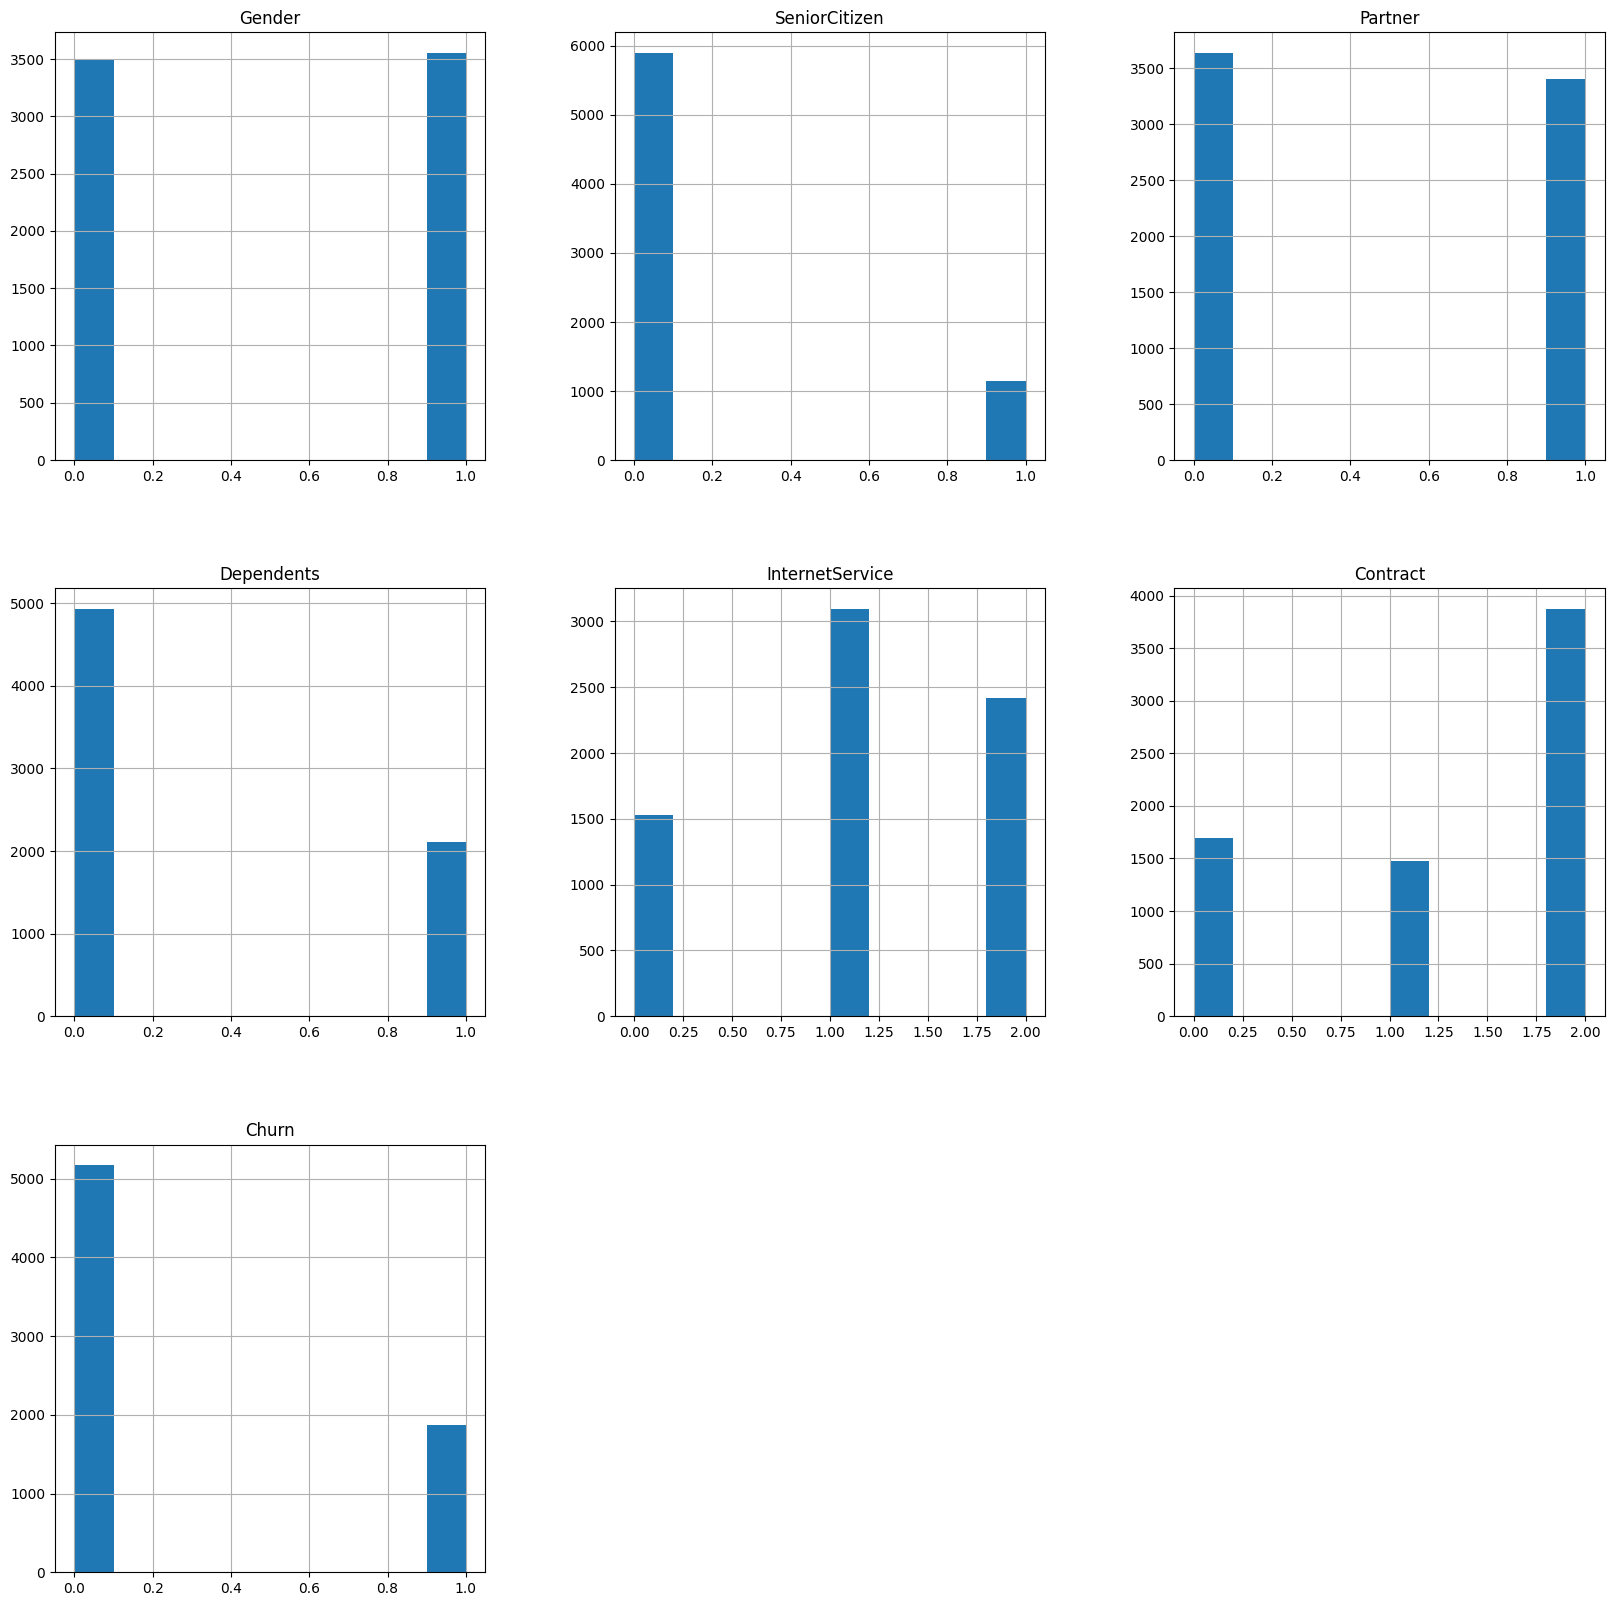

In [280]:
p = data_copy.hist(figsize = (20,20))

In [281]:
data_copy['Gender'].fillna(data_copy['Gender'].mean(), inplace = True)
data_copy['SeniorCitizen'].fillna(data_copy['SeniorCitizen'].mean(), inplace = True)
data_copy['Partner'].fillna(data_copy['Partner'].median(), inplace = True)
data_copy['Dependents'].fillna(data_copy['Dependents'].median(), inplace = True)
data_copy['InternetService'].fillna(data_copy['InternetService'].median(), inplace = True)
data_copy['Contract'].fillna(data_copy['Contract'].median(), inplace = True)

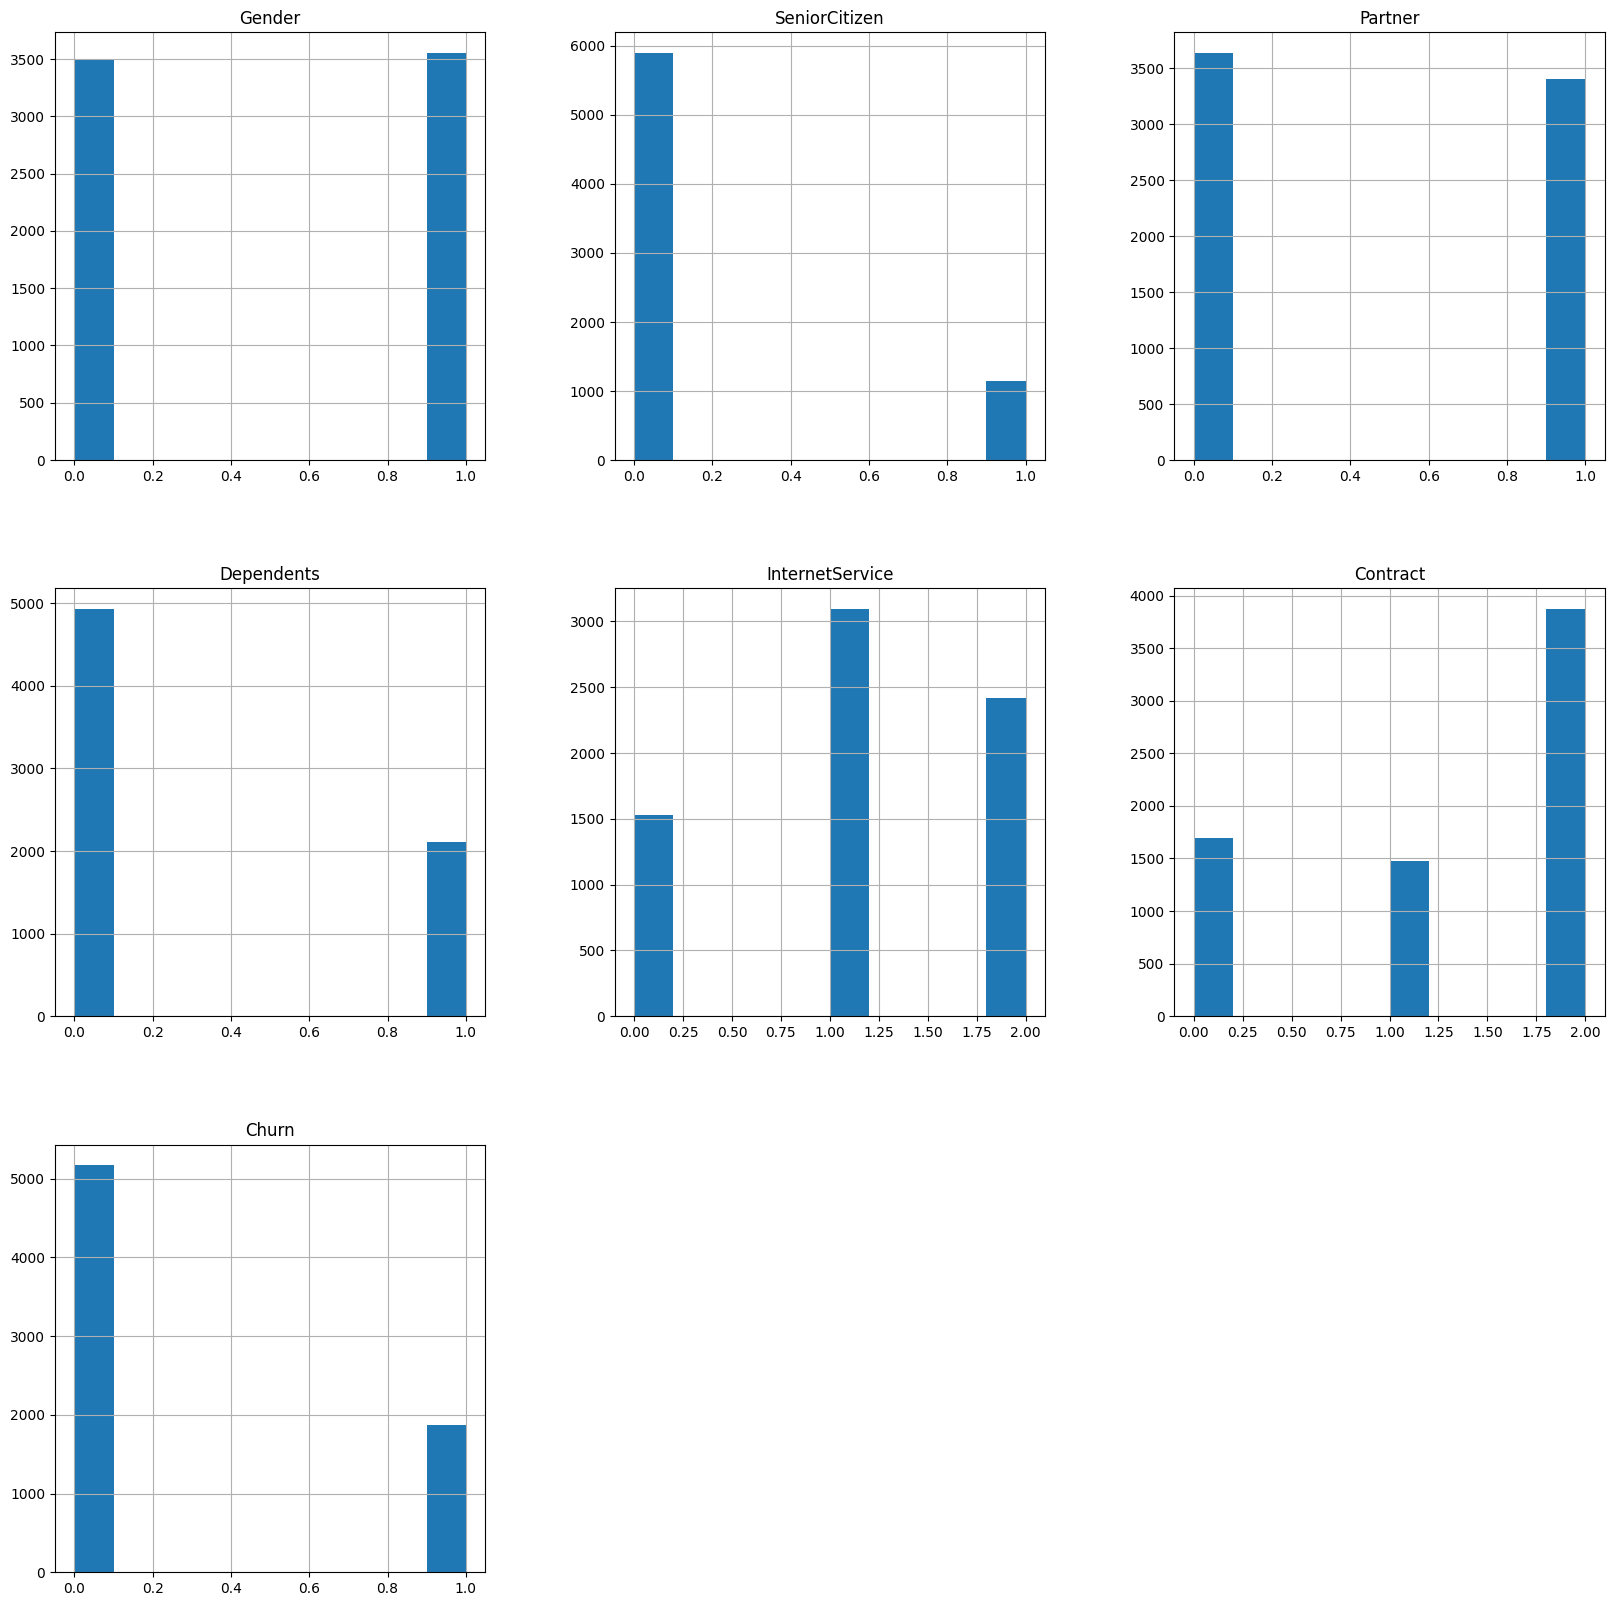

In [282]:
p = data_copy.hist(figsize = (20,20))

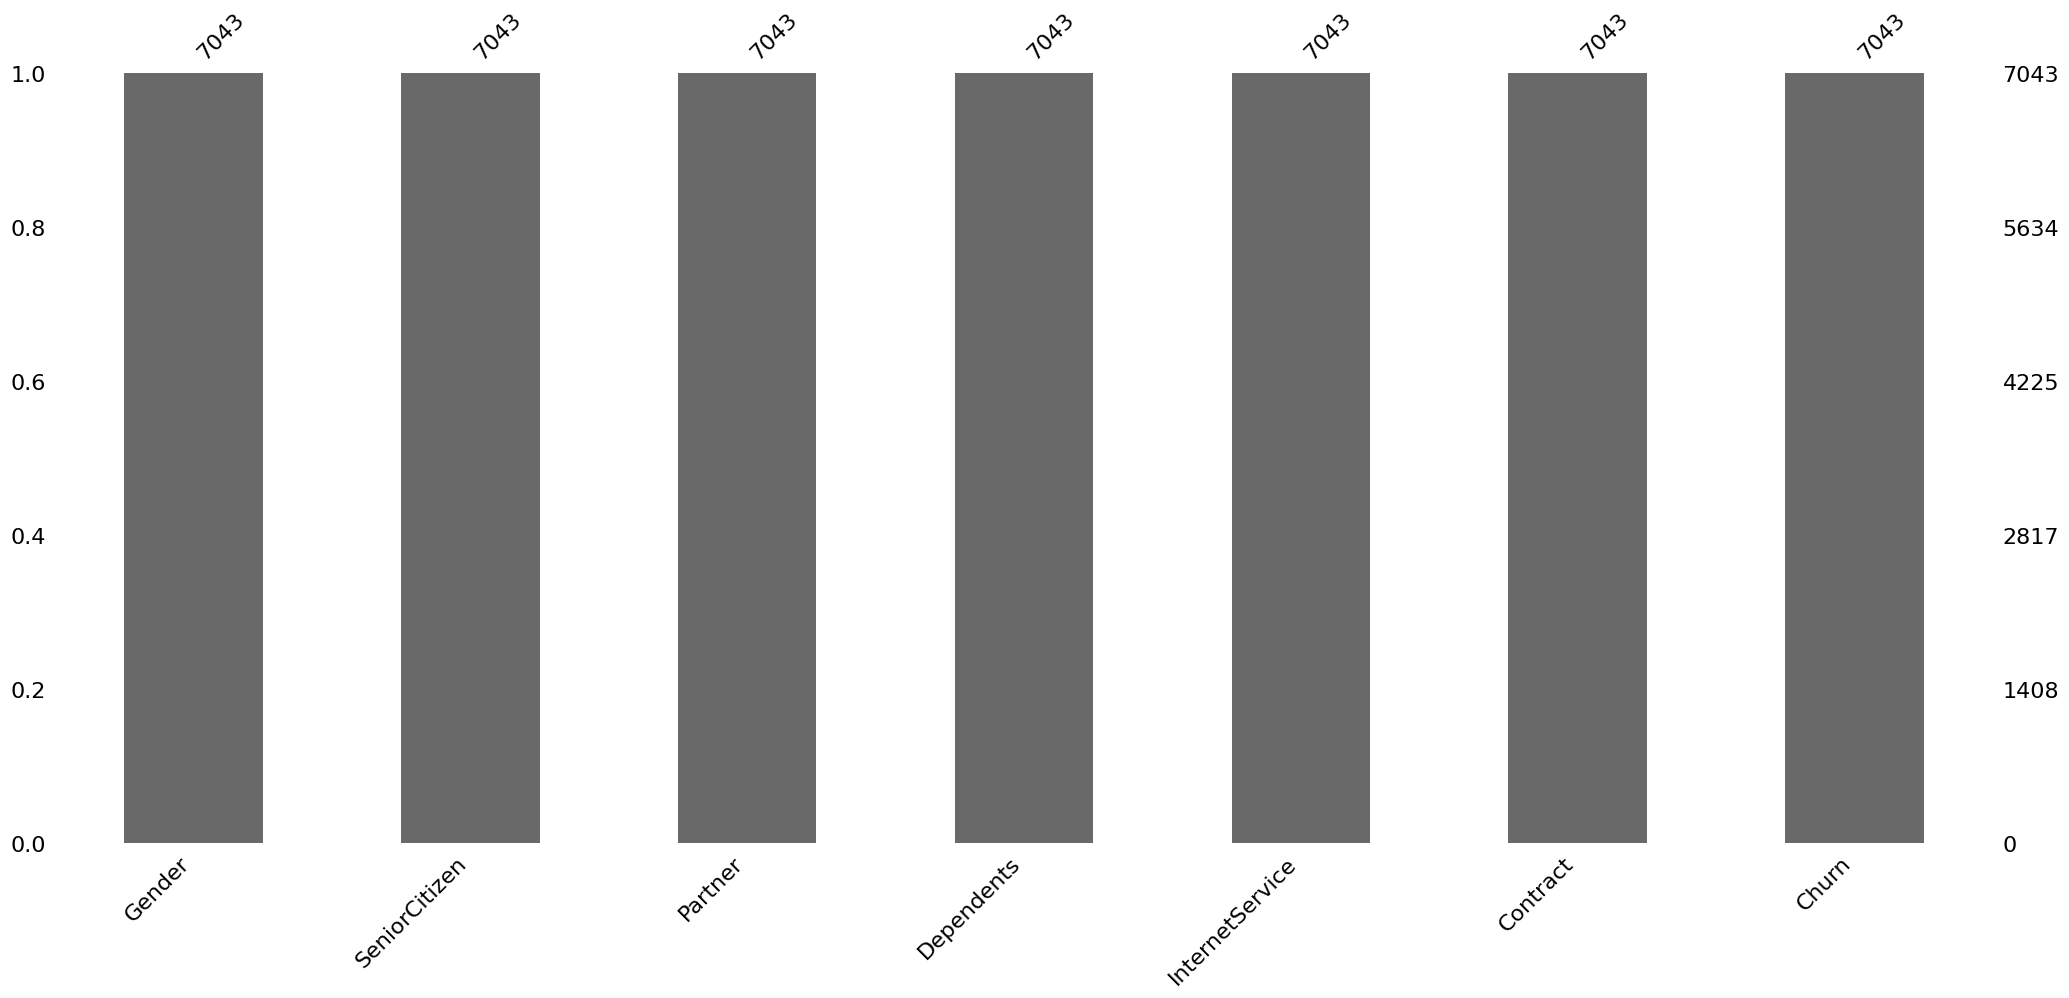

In [310]:
import missingno as msno
p = msno.bar(data)

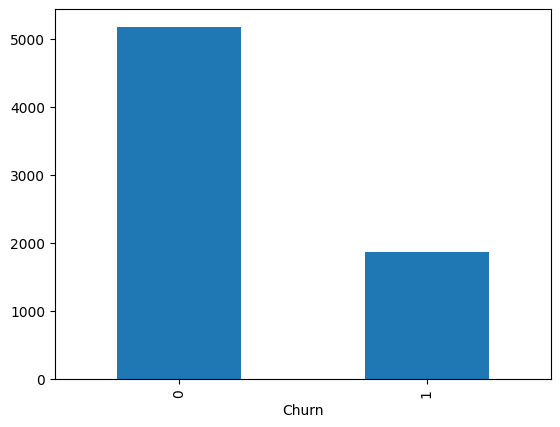

In [284]:
p=data_copy.Churn.value_counts().plot(kind="bar")

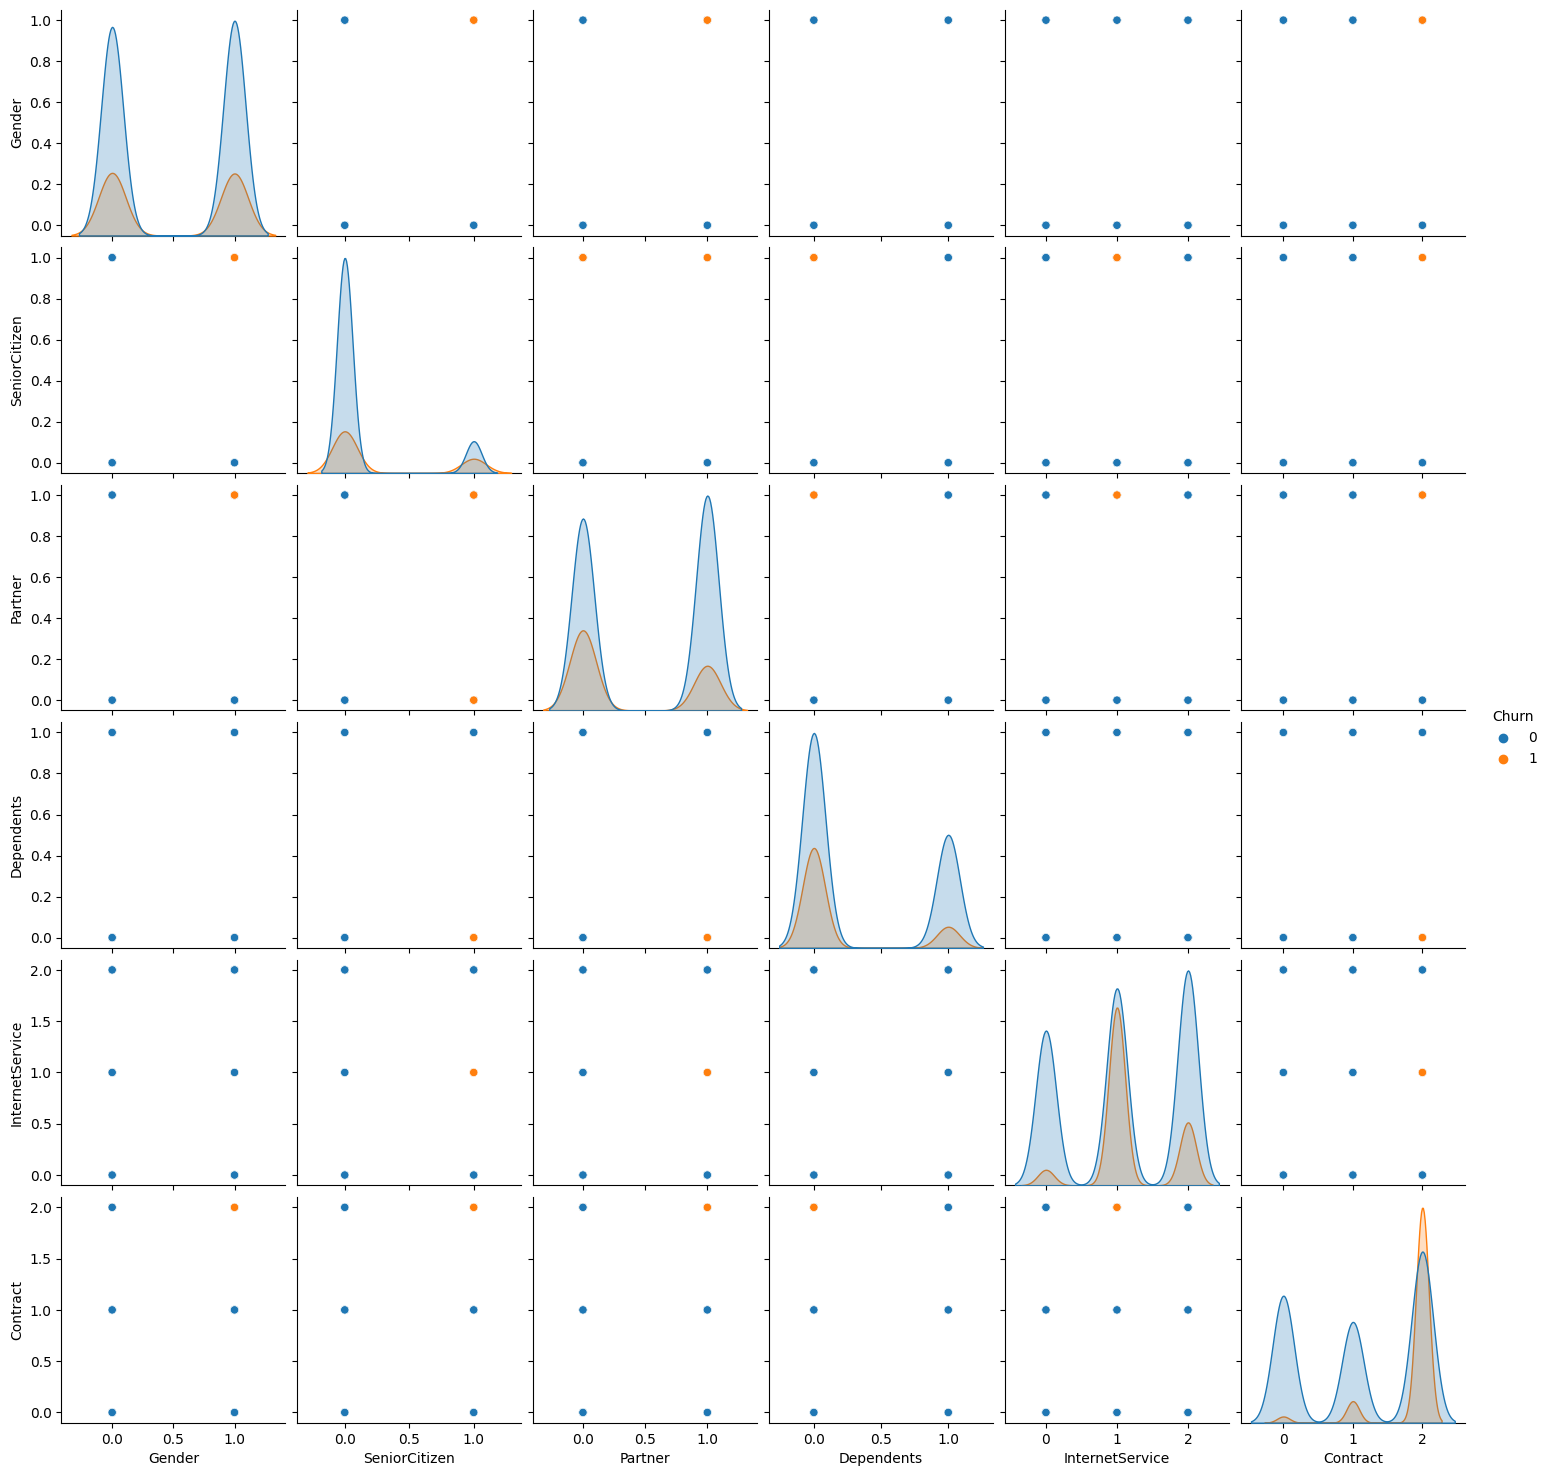

In [285]:
import seaborn as sns
p=sns.pairplot(data_copy, hue = 'Churn')

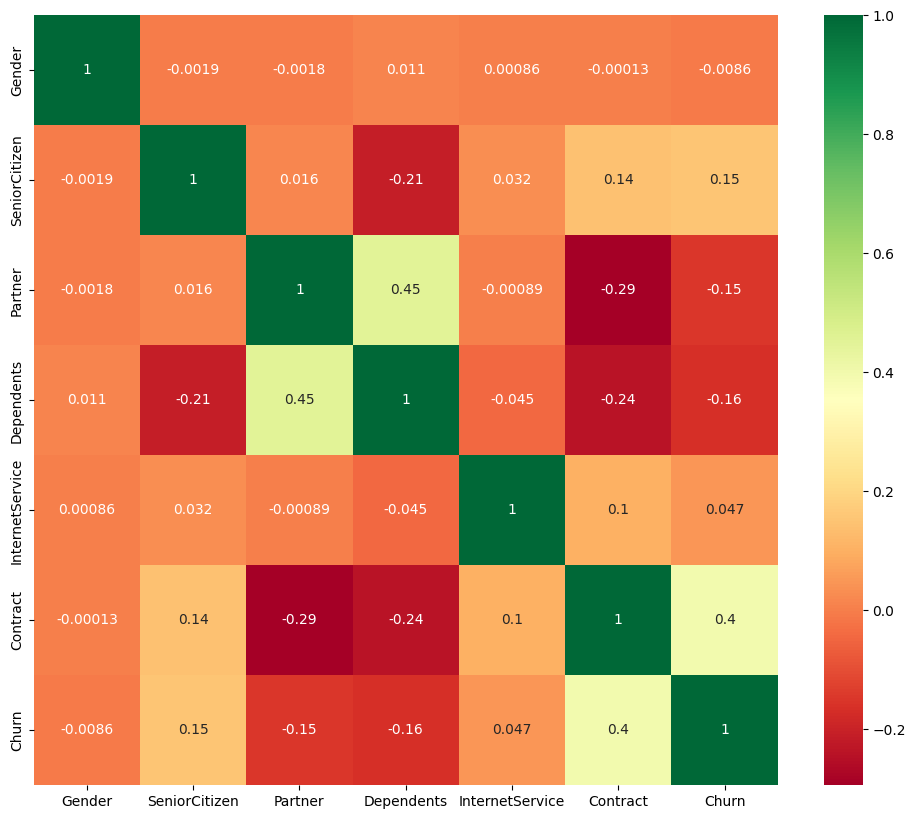

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')

In [287]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Churn"], axis =1),),columns=['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'Contract'])

In [288]:
y =data_copy.Churn

In [289]:
X.head()

,Gender,SeniorCitizen,Partner,Dependents,InternetService,Contract
0,-1.009559,-0.439916,1.034530,-0.654012,1.183234,0.828207
1,0.990532,-0.439916,-0.966622,-0.654012,1.183234,-0.371271
2,0.990532,-0.439916,-0.966622,-0.654012,1.183234,0.828207
3,0.990532,-0.439916,-0.966622,-0.654012,1.183234,-0.371271
4,-1.009559,-0.439916,-0.966622,-0.654012,-0.172250,0.828207


In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [291]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [292]:
max_test_score =max(test_scores)

In [293]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 76.0221465076661 % and k = [11]


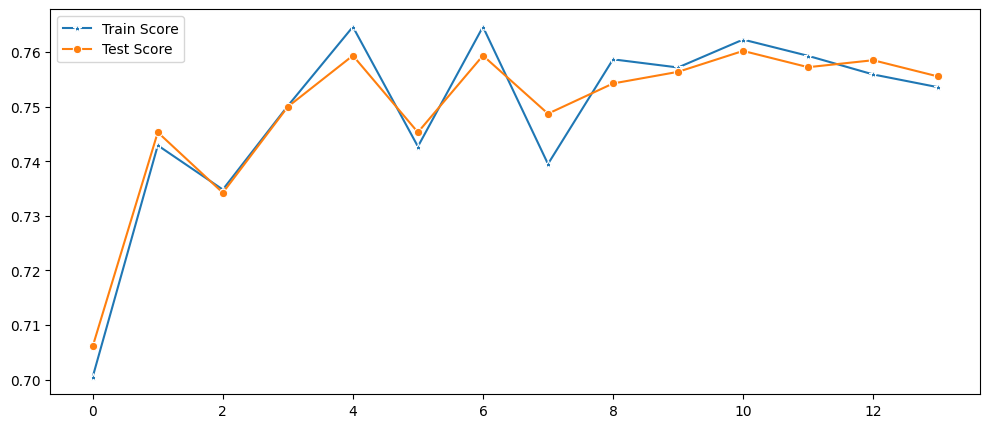

In [294]:
plt.figure(figsize=(12, 5))

p = sns.lineplot(train_scores, marker='*', label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [295]:
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7593696763202725

c:\Users\sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


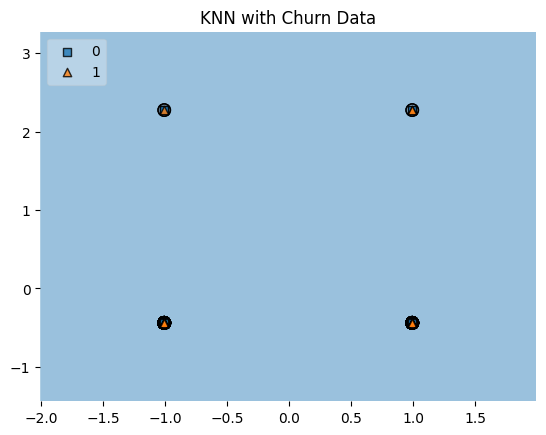

In [296]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width  =20000

plot_decision_regions(X.values, y.values, clf = knn, legend =2,filler_feature_values={2: value, 3: value, 4: value, 5: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width},
                      X_highlight=X_test.values)
plt.title("KNN with Churn Data")
plt.show()

In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

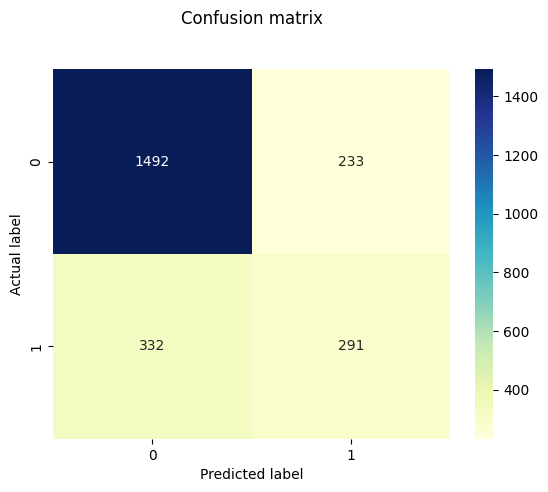

In [298]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [299]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.75937,0.555344,0.467095,0.507411,0.482427


In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1725
           1       0.56      0.47      0.51       623

    accuracy                           0.76      2348
   macro avg       0.69      0.67      0.67      2348
weighted avg       0.75      0.76      0.75      2348



In [301]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

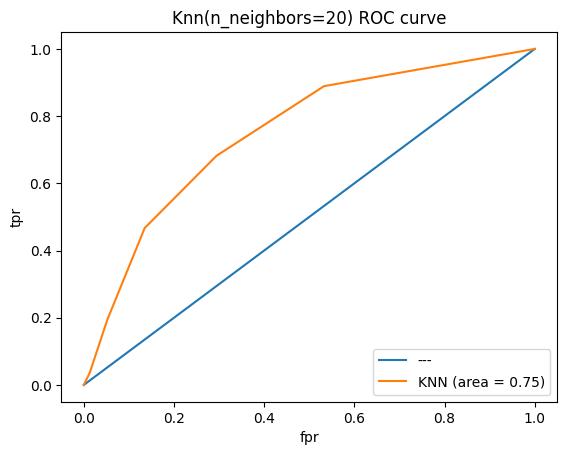

In [302]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], label = "---")
 
plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('Knn(n_neighbors=20) ROC curve')
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [303]:
from sklearn.model_selection import GridSearchCV
parameters_grid = {"n_neighbors": np.arange(0,50)}
knn= KNeighborsClassifier()
knn_GSV = GridSearchCV(knn, param_grid=parameters_grid, cv = 5)
knn_GSV.fit(X, y)

c:\Users\sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklea

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [304]:
print("Best Params" ,knn_GSV.best_params_)
print("Best score" ,knn_GSV.best_score_)

Best Params {'n_neighbors': 44}
Best score 0.7627424551583972


In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()

In [306]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

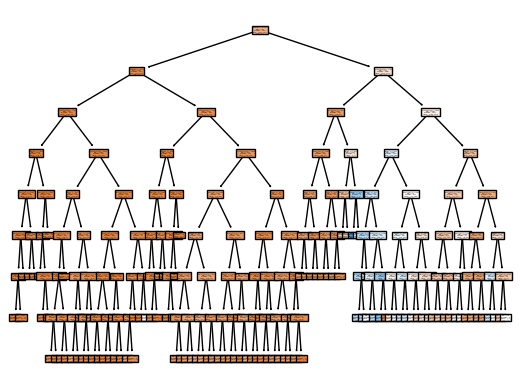

In [307]:
plt.figure()
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()